<!--
SPDX-FileCopyrightText: Copyright (c) 2019-2024 Idiap Research Institute <contact@idiap.ch>
SPDX-FileContributor: Alina Elena Baia <alina.baia.idiap.ch>
SPDX-FileContributor: Darya Baranouskaya <darya.baranouskaya.idiap.ch>
SPDX-FileContributor: Olena Hrynenko <olena.hrynenko.idiap.ch>
-->

# *Practice exercises after Lecture 1*
This notebook contains the submission exercises with instructions and explanations.

Work through the cells below in sequential order, executing each cell as you progress. Throughout the notebook, you will encounter instructions marked with the words "TO DO". Follow the instructions and write code to complete the tasks. Replace all  'raise NotImplementedError()' with your code. Along the way, you will also find questions. Try to reflect on the questions before/after running the code.


This notebook was developped at the [Idiap Research Institute](https://www.idiap.ch) by [Alina Elena Baia](mailto:alina.baia.idiap.ch>), [Darya Baranouskaya](mailto:darya.baranouskaya.idiap.ch) and [Olena Hrynenko](mailto:olena.hrynenko.idiap.ch)

To install the missing libraries you need to follow the guidelines:

* Creating a new env: 
    * my_venvs_create [name_of_your_env]
    * my_venvs_activate [name_of_your_env]
    * my_kernels_create [name_of_your_env] "[Name of your Kernel]"

* Installing packages: torchsummary, torch, torchvision, torchaudio: 
    * pip install torchsummary
    * pip install torch torchvision torchaudio

* Refresh noto

* Go to you practice.ipynb notebook. Choose kernel from Menu -> Kernel -> Change Kernel -> [Name of your Kernel] 

* Restart kernel in Menu -> Kernel -> Restart kernel

* If you want to deactivate the env:
    * my_venvs_deactivate

Noto environment and libraries tutorial: https://noto.epfl.ch/user-redirect/lab/tree/Documentation/11_Tutorial_Envs.ipynb

For this lab you will need several files. Load next files to the same directory as current .ipynb notebook

Required files are:

    * student_exam_data.csv
    * lab1_layer_weights.pth
    * lab1_model_with_4_hidden_layers_weights.pth
    * lab1_image.jpg
    * lab1_audio.wav
    * lab1_textdata_init.txt
    * lab1_model_with_skip_connection_weights.pth
    

In [1]:
import pandas as pd
import torch
import numpy as np
from torch import nn
import os

### Neural network
Building a simple neural network for a binary classification task.
The classification task consists of predicting whether  a student will pass or fail an exam based on multiple attributes that apply to each student.


##### 1.1 Read tabular data for a binary classification task.

We are going to explore the basics of the neural-network contruction on the example of a tabular data. The data contains information about students passing of failing the exam, as well as the informatuon about Study Hours spend on preparation and Previous Exam Score. With neural network we are going to predict if the sudent is going to Pass(1) or Fail(0). The neural networks were pretrained on the train part of the data and now we are goint to test the predictions on a test set of 20 rows.

In [2]:
## NOTE: make sure to upload the csv file into the colab session
# read and prepare the data
# we read the tabular data with pandas library and save it in a Dataframe

data = pd.read_csv('student_exam_data.csv')
x = torch.Tensor(data.iloc[:20, :2].to_numpy())
x_mean = torch.Tensor([5.487, 68.917])
x_std = torch.Tensor([2.688, 17.129])
x = (x - x_mean) /  x_std # Data normalisation, mean and std taken from training
y = torch.Tensor(data.iloc[:20, 2].to_numpy())

# printing the shape of the data
print(x.shape, y.shape)
print(x, y)
# print the dataframe content
data

torch.Size([20, 2]) torch.Size([20])
tensor([[-0.4152,  0.7574],
        [ 1.5139,  0.1897],
        [ 0.7816, -0.6040],
        [ 0.3352,  1.1624],
        [-1.1469,  0.7103],
        [-1.1470, -1.1186],
        [-1.4748,  1.5026],
        [ 1.2309,  1.1930],
        [ 0.3434,  1.6388],
        [ 0.7015,  0.8539],
        [-1.6003,  0.4605],
        [ 1.5782, -0.2232],
        [ 1.1179,  1.5790],
        [-0.9583,  1.3455],
        [-1.0605, -1.5298],
        [-1.0552, -1.5958],
        [-0.6506, -0.3695],
        [ 0.0877,  1.1510],
        [-0.2230,  1.7701],
        [-0.6942, -1.1613]]) tensor([0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 0.])


,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


##### 1.2 Implement a network and make predictions from logits.


In [3]:
#one layer is already a model
#first we need to initialise the element of class Linear
number_of_input_channels = 2 # 'Study Hours' and 'Previous Exam Score'
number_of_classes = 2 # 'Pass' and 'Fail'
layer = nn.Linear(in_features=number_of_input_channels, out_features=number_of_classes)
layer.load_state_dict(torch.load('lab1_layer_weights.pth')) #load pretrained weights 

#then we can apply the our linear model to inputs of specified channel size (2 in our case)
out_logits = layer(x)

out_logits.shape, out_logits


(torch.Size([20, 2]),
 tensor([[ 0.2977, -0.5661],
         [-2.2079,  1.2473],
         [-0.1362, -0.8446],
         [-1.3719,  1.0097],
         [ 1.5393, -1.6187],
         [ 3.5703, -4.1624],
         [ 1.1925, -0.9592],
         [-2.8619,  2.2608],
         [-1.9143,  1.6834],
         [-1.6248,  1.0749],
         [ 2.5538, -2.5780],
         [-1.8540,  0.7599],
         [-3.1069,  2.6453],
         [ 0.5274, -0.4809],
         [ 3.8864, -4.6176],
         [ 3.9511, -4.7023],
         [ 1.9316, -2.4509],
         [-0.9571,  0.6601],
         [-1.1393,  1.1017],
         [ 2.8817, -3.6109]], grad_fn=<AddmmBackward0>))

For classification we want to output the probabilities for each class. To achieve that we can add Softmax layer on top of the outputted logits  


In [4]:
softmax = nn.Softmax()
out_probs = softmax(out_logits)

out_probs.shape, out_probs

/home/nathan/Documents/Deep_Learning/dlenv/lib/python3.10/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


(torch.Size([20, 2]),
 tensor([[7.0345e-01, 2.9655e-01],
         [3.0614e-02, 9.6939e-01],
         [6.7005e-01, 3.2995e-01],
         [8.4585e-02, 9.1541e-01],
         [9.5922e-01, 4.0777e-02],
         [9.9956e-01, 4.3807e-04],
         [8.9583e-01, 1.0417e-01],
         [5.9241e-03, 9.9408e-01],
         [2.6657e-02, 9.7334e-01],
         [6.2988e-02, 9.3701e-01],
         [9.9413e-01, 5.8712e-03],
         [6.8254e-02, 9.3175e-01],
         [3.1657e-03, 9.9683e-01],
         [7.3269e-01, 2.6731e-01],
         [9.9980e-01, 2.0262e-04],
         [9.9983e-01, 1.7450e-04],
         [9.8766e-01, 1.2340e-02],
         [1.6560e-01, 8.3440e-01],
         [9.6126e-02, 9.0387e-01],
         [9.9849e-01, 1.5123e-03]], grad_fn=<SoftmaxBackward0>))

The predictions can be computed by choosing the class with the highest probability for each sample

In [5]:
predictions = out_probs.argmax(axis=1)
print('outputted predictions:\n', predictions)

print('target:\n', y.to(torch.long))  #.to(torch.long) casts float 1.0 and 0.0 values to int type


outputted predictions:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])
target:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])


We see that the model correctly predicts the target output in 19 out of 20 cases

##### 1.3 Learn to use nn.Sequential and network class.


Let's combine the layers together. To run layers subsequently we can add them one by one into the nn.Sequential layer

In [6]:
# model can consist of any number of layers

model = nn.Sequential(
    nn.Linear(in_features=number_of_input_channels, out_features=number_of_classes),
    nn.Softmax(dim=1))

#you can load weights of parts of the model
#but you have to make sure that the keys in dictionary model.state_dict() and in torch.load('lab1_layer_weights.pth') are matching
#also the sizes of tensors corresponding to each key should be the same
#otherwise you will get an error
model[0].load_state_dict(torch.load('lab1_layer_weights.pth')) 


out_probs = model(x)
print('outputted probabilities:\n', out_probs)


predictions = out_probs.argmax(axis=1)
print('outputted predictions:\n', predictions)

print('target:\n', y.to(torch.long))
print('\n\n', 'model')
model

outputted probabilities:
 tensor([[7.0345e-01, 2.9655e-01],
        [3.0614e-02, 9.6939e-01],
        [6.7005e-01, 3.2995e-01],
        [8.4585e-02, 9.1541e-01],
        [9.5922e-01, 4.0777e-02],
        [9.9956e-01, 4.3807e-04],
        [8.9583e-01, 1.0417e-01],
        [5.9241e-03, 9.9408e-01],
        [2.6657e-02, 9.7334e-01],
        [6.2988e-02, 9.3701e-01],
        [9.9413e-01, 5.8712e-03],
        [6.8254e-02, 9.3175e-01],
        [3.1657e-03, 9.9683e-01],
        [7.3269e-01, 2.6731e-01],
        [9.9980e-01, 2.0262e-04],
        [9.9983e-01, 1.7450e-04],
        [9.8766e-01, 1.2340e-02],
        [1.6560e-01, 8.3440e-01],
        [9.6126e-02, 9.0387e-01],
        [9.9849e-01, 1.5123e-03]], grad_fn=<SoftmaxBackward0>)
outputted predictions:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])
target:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])


 model


Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Softmax(dim=1)
)

To get more flexibility with network architecture, we can create a class defining a neural network. The class should have an **__init__** method with layers initialisation and **forward** method defining how those layers should be called. For automatic differentiation and compatibility with torch library, when writing a class of neural networks, it should inherit from a nn.Module class.

In [7]:
#class of neural network. Should have an intialisation and forward pass
class NN1Layer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.linear = nn.Linear(in_channels, out_channels)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        logits = self.linear(x)
        out = self.softmax(logits)
        return out

model = NN1Layer(number_of_input_channels, number_of_classes)
model.linear.load_state_dict(torch.load('lab1_layer_weights.pth'))

out_probs = model(x)
print('outputted probabilities:\n', out_probs)


predictions = out_probs.argmax(axis=1)
print('outputted predictions:\n', predictions)

print('target:\n', y.to(torch.long))
print('\n\n', 'model')
model

outputted probabilities:
 tensor([[7.0345e-01, 2.9655e-01],
        [3.0614e-02, 9.6939e-01],
        [6.7005e-01, 3.2995e-01],
        [8.4585e-02, 9.1541e-01],
        [9.5922e-01, 4.0777e-02],
        [9.9956e-01, 4.3807e-04],
        [8.9583e-01, 1.0417e-01],
        [5.9241e-03, 9.9408e-01],
        [2.6657e-02, 9.7334e-01],
        [6.2988e-02, 9.3701e-01],
        [9.9413e-01, 5.8712e-03],
        [6.8254e-02, 9.3175e-01],
        [3.1657e-03, 9.9683e-01],
        [7.3269e-01, 2.6731e-01],
        [9.9980e-01, 2.0262e-04],
        [9.9983e-01, 1.7450e-04],
        [9.8766e-01, 1.2340e-02],
        [1.6560e-01, 8.3440e-01],
        [9.6126e-02, 9.0387e-01],
        [9.9849e-01, 1.5123e-03]], grad_fn=<SoftmaxBackward0>)
outputted predictions:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])
target:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])


 model


NN1Layer(
  (linear): Linear(in_features=2, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

##### 1.4 Familiarize yourself with summarization and counting of network parameters.

**TODO** create a network that takes Di = 5 inputs, Do = 4 outputs and has three hidden layers of sizes D1 = 20, D2 = 10, and D3 = 7 (4 layers in total). The activation beween linear layers should be a ReLU. What are the sizes of each weight matrix and bias vectors? Output a summary of a model with torchsummary. Calculate the number of parameters in the network. Implement this network in Pytorch and use the count_parameters() function to check your calculation.

In [8]:
#create a simple neural network with nn.Sequential


D_i = 5
D_o = 4

D_1 = 20
D_2 = 10
D_3 = 7
#TODO create a network
# model = ...
# YOUR CODE HERE
# raise NotImplementedError()

model = nn.Sequential(
    nn.Linear(in_features=D_i, out_features=D_1),
    nn.ReLU(),
    nn.Linear(in_features=D_1, out_features=D_2),
    nn.ReLU(),
    nn.Linear(in_features=D_2, out_features=D_3),
    nn.ReLU(),
    nn.Linear(in_features=D_3, out_features=D_o)
    )

#model summary
# you might need to install torchsummary with !pip install torchsummary

from torchsummary import summary
print('model summary')
summary(model, (10, 5)) # summary takes a model and an input data (or a shape of input data)

print('\n\n')
print('model parameters')
print( model.parameters() )
for parameter in model.parameters():
    print(parameter)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('\n\n')
print('number of parameters')
print(count_parameters(model))



model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 10, 20]             120
              ReLU-2               [-1, 10, 20]               0
            Linear-3               [-1, 10, 10]             210
              ReLU-4               [-1, 10, 10]               0
            Linear-5                [-1, 10, 7]              77
              ReLU-6                [-1, 10, 7]               0
            Linear-7                [-1, 10, 4]              32
Total params: 439
Trainable params: 439
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------



model parameters
<generator object Module.parameters at 0x7fac4f47f6f0>
Parameter containing:
ten

In [9]:

#test your solution
# hidden test here
model

Sequential(
  (0): Linear(in_features=5, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=7, bias=True)
  (5): ReLU()
  (6): Linear(in_features=7, out_features=4, bias=True)
)



### Image data

##### 1.5 Recall how to read and visualize an image with a PIL library. Convert an image from tensor to PIL Image object (and vice versa). Display image channels (R,G,B) separately. 

In [11]:
import torch
from torchvision.transforms import v2
from PIL import Image
import matplotlib.pyplot as plt

In [12]:
# read an image using Image module from Pilow python library that has support for opening,
# manipulating, and saving many different image file formats
# https://pillow.readthedocs.io/en/stable/

path = 'lab1_image.jpg'
image = Image.open(path)

In [13]:
# check the number of channels for the image
image.getbands()

('R', 'G', 'B')

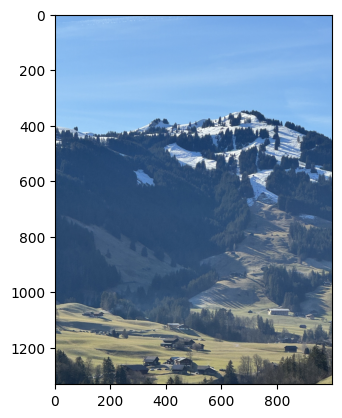

In [14]:
plt.imshow(image)

In [15]:

v2.functional.pil_to_tensor(image)

tensor([[[130, 129, 129,  ..., 112, 110, 110],
         [131, 129, 129,  ..., 113, 109, 108],
         [129, 129, 129,  ..., 112, 110, 108],
         ...,
         [ 46,  45,  33,  ..., 172, 170, 172],
         [ 54,  35,  26,  ..., 172, 169, 165],
         [ 42,  29,  32,  ..., 174, 170, 171]],

        [[181, 180, 180,  ..., 163, 164, 164],
         [182, 180, 180,  ..., 164, 163, 162],
         [180, 180, 180,  ..., 163, 164, 162],
         ...,
         [ 60,  59,  47,  ..., 166, 164, 166],
         [ 68,  49,  40,  ..., 166, 163, 159],
         [ 56,  43,  46,  ..., 168, 164, 165]],

        [[238, 237, 237,  ..., 228, 228, 228],
         [239, 237, 237,  ..., 229, 227, 226],
         [237, 237, 237,  ..., 228, 228, 226],
         ...,
         [ 69,  68,  58,  ..., 116, 114, 116],
         [ 77,  58,  51,  ..., 116, 113, 109],
         [ 65,  52,  57,  ..., 120, 116, 117]]], dtype=torch.uint8)

In [ ]:
def extract_channel(image, channel): 
    '''    
    This function takes RGB PIL image and a channel name (either "R", "G", or "B").
    It should return only Red, Green, or Blue components of the image, setting the unused channels to zero
    image: PIL Image
    channel: str. Possible values: ['R', 'G', 'B']
    
    return: image_single_channel
    '''
    # TODO Visualize each channel of an RGB image
    # YOUR CODE HERE
    raise NotImplementedError()
    return(image_single_channel)

In [ ]:
for i in ["R", "G", "B"]:
    plt.imshow(extract_channel(image, i))
    plt.show()

##### 1.6 Apply image manipulation techniques: rotation and adjustment of the brightness.

there are multuple libraries on image editing, we will stick to using the transformations that are provided by the pytorch

In [ ]:
v2.functional.rotate(image, -20, expand = True)

In [ ]:
v2.functional.adjust_brightness(image, 0.3)

"torchvision.transforms are common image transformations. They can be chained together using Compose. Additionally, there is the torchvision.transforms.functional module. Functional transforms give fine-grained control over the transformations. This is useful if you have to build a more complex transformation pipeline (e.g. in the case of segmentation tasks)." https://pytorch.org/vision/0.8/transforms.html

### Audio

##### 1.7 Recall what mono and stereo audio signals are and how they are digitized. Read audio files with pytorch.


To easily work with audio files in python they should be presented in .wav format.

Sound is a continuous signal. To digitize the signal, we take a certain number of samples per second. The number of samples per second is called the sampling rate
[https://www.izotope.com/en/learn/digital-audio-basics-sample-rate-and-bit-depth.html#:~:text=Sample%20rate%20is%20the%20number,frequencies%20captured%20in%20digital%20audio.]



 We can read waveform and a sample rate as tensors with torch function torchaudio.load(filename). Waveform is a sequence of amplitudes in the range [-1, 1]. Waveform is a 2 dimensional vector where first dimension is number of channels, for example mono sound has 1 channel, stereo sound has 2 channels

Install torchaudio with pip, if not installed yet

In [ ]:
import torchaudio
import matplotlib.pyplot as plt

from IPython.display import Audio, display


In [ ]:
# NOTE: make sure to upload the audio file in the colab session
audio_filepath = 'lab1_audio.wav'
# To easily work with audio files they should be presented in .wav format
# load the audio as a waveform
# with pytorch
waveform, sample_rate = torchaudio.load(audio_filepath)
waveform, sample_rate

In [ ]:
## Print shape and minimal and maximal values of the read waveform
print('waveform shape', waveform.shape)
print('waveform min value', waveform.min())
print('waveform max value', waveform.max())

##### 1.8 Visualize audio files for a mono signal as waveform and spectrogram.

Let's visualise and hear the audio. 

Torch can display audio samples with 1 or 2 channels

In [ ]:
#audio playing

def play_audio(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    if num_channels == 1:
        display(Audio(waveform[0], rate=sample_rate))
    elif num_channels == 2:
        display(Audio((waveform[0], waveform[1]), rate=sample_rate))
    else:
        raise ValueError("Waveform with more than 2 channels are not supported.")


play_audio(waveform, sample_rate)


In [ ]:
# plotting one channel of a waveform


def plot_1d_waveform(waveform, sample_rate):
    plt.figure(figsize=(5, 5))
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    # waveform[0] - the first channel of our mono audio
    plt.plot(time_axis, waveform[0], linewidth=1)
    plt.grid(True)
    plt.xlabel('Channel 1')
    plt.title('Waveform')
    plt.show(block=False)


plot_1d_waveform(waveform, sample_rate)


In [ ]:

# plotting one channel of a spectrogram

def plot_1d_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    plt.specgram(waveform[0], Fs=sample_rate)
    plt.xlabel('Channel 1')
    plt.title('Spectrogram')
    plt.show()

plot_1d_specgram(waveform, sample_rate)

##### 1.9 Modify the audio speed and save the modified audio file.

In [ ]:

def change_speed(wav, sample_rate, factor):
    t = torchaudio.transforms.Speed(sample_rate, factor)
    return t(wav)


#speed up
factor = 1.5
play_audio(change_speed(waveform, sample_rate, factor)[0], sample_rate)


In [ ]:
#slow down
factor = 0.75
play_audio(change_speed(waveform, sample_rate, factor)[0], sample_rate)

In [ ]:
# save audio
path = "lab1_audio_saved.wav"
torchaudio.save(path, waveform, sample_rate)

##### 1.10 Add noise to the audio with torchaudio.


In [ ]:
import torch
import numpy as np


def add_noise(wav, snr):
    #TODO add noise with torchaudio.transforms

    #return variable noisy_audio
    # YOUR CODE HERE
    raise NotImplementedError()
    return noisy_audio


noisy_waveform = add_noise(waveform, snr=np.array([0.1, 0.9]))
play_audio(noisy_waveform, sample_rate)

### Text data:



##### 1.11 Read text data from a given file and explore different reading functions. 

*   read text from .txt file
*   explore different reading functions (i.e. read(), readlines())

More about reading functions:
https://www.geeksforgeeks.org/reading-writing-text-files-python/

https://stackoverflow.com/questions/58073162/difference-in-read-readline-and-readlines-in-python



In [ ]:
#NOTE: make sure to upload the text file into the colab session

#read txt file
#open the text file open("File_Name","Access_Mode")
#access_mode -> "r": read only, "r+": read and write, "w": write only, "w+" write and read, "a": append only, "a+" append and read
text_data = open("lab1_textdata_init.txt", "r+")

#read the data from the .txt file into a string
# read() function reads an entire file, as though it were a string
lines = text_data.read()

#check the type of the text file, the type of variable lines
print("The output of Read function is ")
print(type(text_data),type(lines))

#print the content of lines varible
print(lines)

In [ ]:
# read each line into a string and storing all lines into a list of strings
# readlines() will return all the lines in a file in the format of a list where each element is a line in the file
text_data = open("lab1_textdata_init.txt", "r+")
lines = text_data.readlines()

print("The output of Readline function is ")
print(type(text_data),type(lines))

#print the content of lines varible
print(lines)


#iterate over each line with a for-loop
for idx, line in enumerate(lines): # we use enumerate() to get a counter in the loop
  print("Stripped Line {}: {}".format(idx +1, line.strip()))

##### 1.12 Append new text data into an existing file.



*   add text to the existing text file



In [ ]:
# save the text file into another file
import shutil #shutil module supports operations for files, such as copying and removal

# let's make a copy of the initial .txt file
# use copyfile(source_file, destination_file) to make a copy of the initial text file

shutil.copyfile('lab1_textdata_init.txt','lab1_textdata_extra.txt')

In [ ]:
# TODO Append new text data at the end of the file

# open the file with append and read mode to allow for content to be appended at the end of the file
# (1 line of code)
# text_data = ...

# YOUR CODE HERE
raise NotImplementedError()

# use write() method to write a specified text to the file

text_data.write("\n")
text_data.write("This is an extra sentence )(*& for cleaning purposes %^&: here is a toy e-mail for practice exercise: toy_email@gmail.com . pls do not use this email. \n")
text_data.write("NOTE: the above e-mail doesn't exists. ")
text_data.close()


#read the text file again and check if the sentences were appended succesfully to the file
text = open("lab1_textdata_extra.txt", "r")
lines = text.readlines()
print(lines)

for idx, line in enumerate(lines):
    print("Line {}: {}".format(idx +1, line.strip()))


##### 1.13 Preprocess small chunks of text data using different techniques such as stopwords removal, stemming, and lemmatization.



*   preprocess text data:
      - remove stopwords (stopwords are the most commonly occurring words in a text which do not provide any valuable information)
      - remove punctuation
      - perform lemmatization (lemmatization is a systematic way to reduce the words into their lemma by matching them with a language dictionary; lemma is an actual language word, whereas stem may not be an actual word.)
      - perform stemming (stemming is a process to reduce the word to its root stem for example run, running, runs, runed derived from the same word as run)

More about text processing techniques:
https://www.analyticsvidhya.com/blog/2021/06/must-known-techniques-for-text-preprocessing-in-nlp/



In [ ]:
import nltk # Natural Language Toolkit library

#download modules necessary for text preprocessing, i.e. stopwords, punctuation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
#Tokenize the text with nltk (Natural Language Toolkit library)
from nltk.tokenize import word_tokenize

# We use the word_tokenize(text) function to  divide the text  into lists of words by splitting the text based on whitespace and punctuation
# https://www.nltk.org/api/nltk.tokenize.html


# TODO: Apply word tokenization on the first line of the text file and print the tokenization output
# (2 lines of code)
# fl_word_tokens = ...
# print( ... )
# YOUR CODE HERE
raise NotImplementedError()

# check the difference with split() method that splits a string into a list.
# You can specify the separator, default separator is any whitespace.
print('\n\n')
print("first line splitted: ", lines[0].strip().split(" "))

In [ ]:
# Remove stopwords with nltk (Natural Language Toolkit library)

from nltk.corpus import stopwords
# stopwords.words('english')
# get the set of English stopwords
stop_words = set(stopwords.words('english'))
print("set of stopwords: ", stop_words)

#TODO: After tokenization, remove the stopwords from the first line of the text file
# create an empty list to save the words that are NOT stopwords
# (1 line of code)
# fl_no_stopwords = ...
# YOUR CODE HERE
raise NotImplementedError()


# create a for-loop to iterate over every words in fl_word_tokens (1 line of code)
# check stopword condition with if-statement: (1 line of code)
# if the word from fl_word_tokens is not a stopword, append it to the list fl_no_stopwords (1 line of code)
# otherwise do nothing and move to the next word
# NOTE: call lower() on each word to convert the string to lower case since the set of stopwords are all in lowercase


# YOUR CODE HERE
raise NotImplementedError()
print('\n\n')
print("filtered first line (list of words): ", fl_no_stopwords)

# now the first line is split into a list of words and had the stopwords remove
# we can put all the words back into one string using join()
print('\n\n')
print("filtered first line (all words in one string): ", " ".join(fl_no_stopwords))



In [ ]:
## Doing lemmatization
# import these modules for lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() #an instance of WordNet Lemmatizer

print("Performing lemmatization on a single word") #use lemmatize() method of lemmatizer ojbect
single_word = "studies"
print(" Lemma for {} is {}.".format(single_word, lemmatizer.lemmatize(single_word)))

print("\n")
#TODO: perform lemmatization on all words in fl_no_stopwords using a for-loop (1 line of code)
#      convert the words to lower case and check using isalpha() method if all the characters of the word are alphabet letters (1 line of code)
#      if the above condition is True, print the lemma of the word (1 line of code), otherwise do nothing

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Remove stopwords with nltk (Natural Language Toolkit library)

from nltk.corpus import stopwords
# stopwords.words('english')
# get the set of English stopwords
stop_words = set(stopwords.words('english'))
print("set of stopwords: ", stop_words)

#TODO: After tokenization, remove the stopwords from the first line of the text file
# create an empty list to save the words that are NOT stopwords
# (1 line of code)
# fl_no_stopwords = ...
# YOUR CODE HERE
raise NotImplementedError()


# TODO: create a for-loop to iterate over every words in fl_word_tokens (1 line of code)
# check stopword condition with if-statement: (1 line of code)
# if the word from fl_word_tokens is not a stopword, append it to the list fl_no_stopwords (1 line of code)
# otherwise do nothing and move to the next word
# NOTE: call lower() on each word to convert the string to lower case since the set of stopwords are all in lowercase


# YOUR CODE HERE
raise NotImplementedError()
print('\n\n')
print("filtered first line (list of words): ", fl_no_stopwords)

# now the first line is split into a list of words and had the stopwords remove
# we can put all the words back into one string using join()
print('\n\n')
print("filtered first line (all words in one string): ", " ".join(fl_no_stopwords))





*   write a function *preprocess_text(text)* that applies the above operations sequentially to string
*   apply the *preprocess_text()* to each line in the .txt file
*   in addition, apply word substitution to further clean up the text.  For the word substitution, add the following substitution rules: substitute “e - mail” with “email”, “pls” with “please”.
*   analyze the effect of preprocessing on the semantic of text: what do you observe?



In [ ]:
## Doing Stemming
# import these modules
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer

from nltk.tokenize import word_tokenize

stemmer = PorterStemmer() #an instance of PorterStemmer stemmer

print("Performing stemming on a single word") #use stem() method of stemmer ojbect
single_word = "studies"
print(" Stemming for {} is {}.".format(single_word, stemmer.stem(single_word)))

print("\n")
#TODO: perform stemming on all words in fl_no_stopwords using a for-loop (1 line of code)
#      convert the words to lower case and check using isalpha() method if all the characters of the word are alphabet letters (1 line of code)
#      if the above condition is True, print the stem on the word (1 line of code), otherwise do nothing

# YOUR CODE HERE
raise NotImplementedError()

##### 1.14 Generate a visual representation of words that accounts for their frequency in the text.

In [ ]:
### write a function to prreprocess text (i.e. a string of multiple words)
### that includes the text preprocessing techniques seen above

import string   # contains some constants, utility function,
                # and classes for string manipulation.

import re       # provides regular expression support
                # i.e. The re.sub(pat, replacement, str) function searches for
                # all the instances of pattern in the given string, and replaces them.
                # https://developers.google.com/edu/python/regular-expressions

def preprocess_text(text):
    """
      Perform preprocessing and cleaning on a string containing multiple words (i.e. sentences)

      Arguments:
        text: string
    """

    ## Remove newline character
    text = text.strip("\n")



    # TODO: Convert words of a string to lower case and split the string based on whitespaces
    #  use lower() and split()
    #  (1 line of code)
    # text = ...
    # YOUR CODE HERE
    raise NotImplementedError()

    ## Remove stop words and also remove the words with less than 3 characters
    stops = set(stopwords.words("english"))

    # create an empty list to save the words
    tmp = []
    # TODO: iterate  over every word  (1 line of code)
    # check if the word is not a stopwords and that has more than 3 characters (1 line of code)
    # if condition is True, append the word to tmp (1 line of code)

    # YOUR CODE HERE
    raise NotImplementedError()

    text = tmp

    # # put the words back into a string
    text = " ".join(text)

    ## Write substituton rules

    #Here is a regular expression to substitute a string of characters that are not a letters or numbers
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)


    # TODO write the substituion rule: "e - mail" -> "email"
    # (1 line of code)
    # text = ...
    # YOUR CODE HERE
    raise NotImplementedError()

    # TODO write the substituion rule: "pls" -> "please"
    # (1 line of code)
    # text = ...
    # YOUR CODE HERE
    raise NotImplementedError()

    # Perform stemming
    # split the text
    text = text.split()

    # define the stemmer
    stemmer = PorterStemmer()
    # create an empty list to save the stemmed words
    stemmed_words = []

    # TODO: perform stemming on each word using a for loop and append the stems to stemmed_words
    # (2 lines of code)
    # YOUR CODE HERE
    raise NotImplementedError()

    text = " ".join(stemmed_words)
    return text


# reading the entire text as one string:
text_data = open("lab1_textdata_extra.txt", "r+")
lines = text_data.read()
print("noisy text as one string:\n", lines)
print()
print("cleaned text as one string:\n ", preprocess_text(lines))




*   you can also create cool visualizations for your text data using word clouds



In [ ]:
#just in case the library is not installed uncommnet and run the following line
# !pip install wordcloud


In [ ]:
# you can also create cool visualizations for your text data using word clouds

from os import read
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = open("lab1_textdata_init.txt", "r+")
lines = text_data.read()

wordcloud = WordCloud(width = 500, height = 300,
                background_color ='white',
                min_font_size = 10).generate(lines)

# plot the WordCloud image
plt.figure(figsize = (8, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Additional exercises

##### 1.15 Implement a class of (a skip-connection) network of a specified architecture, analyse the number of parameters, modify a layer without modifying the class code, save the weights and compute the file size.

**TODO:** Create a neural network class with 3 hidden layers and a skip connection between first and second hidden layer.

Each layer should be a class variable (they are called instance variables in Python) l{i}, where i is the number of a layer. First two layers should be a sequential of a Linear Layer and a ReLU function. The last layer should be a Linear layer only. Additionaly the variable softmax stores the nn.Softmax() function.


A number of input channels, a number of output channels and number of channels in the second dimension should be specified as initialisation parameters in_channels, out_channels, and hidden_channels correspondingly.




In [ ]:
#TODO: Create a model with 3 hidden layers and a skip connection between first and second hidden layer
# hidden dimension should be passed as a parameter to a neural network
# report the number of hidden parameters, disable the bias for the last layer

class NNSkip(nn.Module):
    def __init__(self, in_channels, out_channels, hidden_channels):
        super().__init__()
        #TODO: fill in the gaps for layer 1
        self.l1 = nn.Sequential(
            # YOUR CODE HERE
            raise NotImplementedError()
            )
        #TODO: define layer 2 and 3
        # YOUR CODE HERE
        raise NotImplementedError()

        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = 0
        #TODO: implement the forward pass with a skip connection
        # return the output out
        # YOUR CODE HERE
        raise NotImplementedError()

        return out

hidden_channels = 16
model = NNSkip(number_of_input_channels, 2, hidden_channels)
model.load_state_dict(torch.load('lab1_model_with_skip_connection_weights.pth'))
#if the model is constructed incorrectly you will get an error with weights loading


out_probs = model(x)
predictions = out_probs.argmax(axis=1)
print('outputted predictions:\n', predictions)

print('target:\n', y.to(torch.long))

assert np.all(predictions.numpy() == y.to(torch.long).numpy()) #this model was trained to output correct answer for all 20 test samples


print('\n\n', 'model')
model


**TODO:** Change the activation function for the first layer from ReLU to Sigmoid by operating only with existing object 'model'. Do not change the class code, do not create a new class. Change only one layer

In [ ]:

#TODO: in model, change the activation function for the first layer to Sigmoid
#add 1 line
# YOUR CODE HERE
raise NotImplementedError()

out_probs = model(x)
predictions = out_probs.argmax(axis=1)
print('outputted predictions:\n', predictions)

print('\n\n', 'model')
model

In [ ]:
#hidden tests to check your solution are here

assert np.all(model(x).argmax(axis=1).detach().numpy() == np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
print( model.parameters() )
summary(model, (10, 2))
for parameter in model.parameters():
    print(parameter)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_parameters(model))


**TODO:** save the model weights as 'model.pth' file and count the file size in bytes

In [ ]:
# TODO save the model weight and output the file size
# save the model weights to model.pth file
# 1 line of code
# YOUR CODE HERE
raise NotImplementedError()

assert model.load_state_dict(torch.load('model.pth'))


#measure filesize in bytes
#initialise variable filesize
filesize = ...
# YOUR CODE HERE
raise NotImplementedError()
print('file size in bytes is', filesize)
